# Exercise 5, answers

## Task 1

The stability rule becomes
$$
(2x_1,2x_2)-\lambda(1,1) = (0,0),
$$
and completementary rule becomes
$$
\lambda(x_1+x_2-1) = 0.
$$
Thus, we need to have:

$$
\left\{
\begin{align}
2x_1-\lambda=0\quad (1)\\
2x_2-\lambda=0\quad (2)\\
\lambda(x_1+x_2-1) = 0\quad (3)
\end{align}
\right.
$$

Now deducting equation (2), from equation (1) gives $2x_1-2x_2=0$, thus $x_1=x_2$.  Now if $\lambda= 0$, then $x_1=x_2=0$. However, this solution is not feasible. Thus, $\lambda\neq0$, which implies $x_1+x_2-1=0$, which gives $x_1=x_2=\frac12$ and, thus, $\lambda=1$. These values satisfy KKT conditions.

Because the problem is quadratic, it has an optimal solution. Since only one solution satisfies KKT conditions, this solution is optimal.

## Task 2

Now,
$$
\begin{align}
\nabla_x L_c(x^*,\lambda^*)& = \nabla f(x^*)+\sum_{k=1}^K \lambda^*_k\nabla h_k(x^*)+c\nabla(\sum_{k=1}^Kh_k(x^*)^2)\\
&=\nabla f(x^*)+\sum_{k=1}^K \lambda^*_k\nabla h_k(x^*)+2c\sum_{k=1}^Kh_k(x^*)\nabla h_k(x^*)\\
&=0+2c\sum_{k=1}^K0\nabla h_k(x^*)=0.
\end{align}
$$
The first zero is given by the KKT conditions and the second zero is due to the solution being feasible.

## Task 3

* max 2p, 2p for correct result, reductions if flaws

In [1]:
def f_demo5(x):
    return x[0]**2+x[1]**2+x[2]**3+(1-x[3])**2,[],[x[0]**2+x[1]**2-1,x[0]**2+x[2]**2-1]

In [2]:
import numpy as np
import ad

# from the lectures


#if k=0, returns the gradient of lagrangian, if k=1, returns the hessian
def diff_L(f,x,m,k):
    #Define the lagrangian for given m and f
    L = lambda x_: f(x_)[0] + (np.matrix(f(x_)[2])*np.matrix(m).transpose())[0,0]
    return ad.gh(L)[k](x)
#Returns the gradients of the equality constraints
def grad_h(f,x):
    return  [ad.gh(lambda y: 
            f(y)[2][i])[0](x) for i in range(len(f(x)[2]))] 

#Solves the quadratic problem inside the SQP method
def solve_QP(f,x,m):
    left_side_first_row = np.concatenate((
    np.matrix(diff_L(f,x,m,1)),
    np.matrix(grad_h(f,x)).transpose()),axis=1)
    left_side_second_row = np.concatenate((
    np.matrix(grad_h(f,x)),
    np.matrix(np.zeros((len(f(x)[2]),len(f(x)[2]))))),axis=1)
    right_hand_side = np.concatenate((
    -1*np.matrix(diff_L(f,x,m,0)).transpose(),
    -np.matrix(f(x)[2]).transpose()),axis = 0)
    left_hand_side = np.concatenate((
                                    left_side_first_row,
                                    left_side_second_row),axis = 0)
    temp = np.linalg.solve(left_hand_side,right_hand_side)
    return temp[:len(x)],temp[len(x):]
    
    

def SQP(f,start,precision):
    x = start
    m = np.ones(len(f(x)[2]))
    f_old = float('inf')
    f_new = f(x)[0]
    iters = 1
    while abs(f_old-f_new)>precision:
        print(x)
        f_old = f_new
        (p,v) = solve_QP(f,x,m)
        x = x+np.array(p.transpose())[0]
        m = m+v
        f_new = f(x)[0]
        iters = iters + 1
    return x, iters

In [3]:
# The solution obtianed by the SQP method hoghly depends on the selected starting point!
x0 = [-5,-3,-4,-5]
#x0 = [0.001,1.2,-1,0.9]
print(f_demo5(x0))
x_opt = SQP(f_demo5,x0,0.00001)
print(f_demo5(x_opt[0]),x_opt[1])
print(x_opt)

(6, [], [33, 40])
[-5, -3, -4, -5]
[-2.63475463 -1.44207562 -1.95655672  1.        ]
[-1.54105116 -0.65909536 -0.93262382  1.        ]
[-1.10236106 -0.31228849 -0.45411465  1.        ]
[-0.98398997 -0.22943459 -0.2774581   1.        ]
[-0.98017145 -0.2003158  -0.20951184  1.        ]
[-0.98637757 -0.1677956  -0.16942482  1.        ]
[-0.99037906 -0.14100694 -0.14127238  1.        ]
[-0.99293463 -0.12045614 -0.120495    1.        ]
[-0.99463683 -0.10464454 -0.10464964  1.        ]
[-0.99581466 -0.09224101 -0.09224161  1.        ]
[-0.99665697 -0.08230615 -0.08230622  1.        ]
[-0.99727668 -0.07419799 -0.074198    1.        ]
[-0.99774395 -0.06747193 -0.06747193  1.        ]
[-0.99810385 -0.06181303 -0.06181303  1.        ]
[-0.99838625 -0.05699305 -0.05699305  1.        ]
[-0.99861147 -0.05284314 -0.05284314  1.        ]
[-0.9987937  -0.04923603 -0.04923603  1.        ]
[-0.99894304 -0.04607414 -0.04607414  1.        ]
[-0.99906682 -0.0432816  -0.0432816   1.        ]
[-0.99917048 -0

### What is going on in here?

* Many feasible solutions actually satisfy KKT conditions, but are not global optima


* In addition, the problem has multiple local but not global optimal




In [4]:
# These two are actually the globally optimal solutions where the objective value is zero. How can one know that?
x0 = [0.0,1.0,-1.0,1.0]
print(f_demo5(x0))
x0 = [0.0,-1.0,-1.0,1.0]
print(f_demo5(x0))

(0.0, [], [0.0, 0.0])
(0.0, [], [0.0, 0.0])


Since we know that $x_4=1$ in the optimal solution and using the first constraint, we can write the problem as 
$$
\begin{align}
\min \qquad & x_3^3 + 1\\
\text{s.t.}\qquad &x_1^2+x_3^2=1\\
    &x\in\mathbb R^2
\end{align}
$$


In [6]:
# Plot the objective function values and the constraint function values
import numpy as np
from pylab import meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_2d_function(lb1,lb2,ub1,ub2,f,f2):
    x = np.arange(lb1,ub1,0.1)
    y = np.arange(lb2,ub2,0.1)
    X,Y = meshgrid(x, y) # grid of point
    Z = [f([x,y]) for (x,y) in zip (X,Y)] # evaluation of the objective function on the grid
    Z = np.asarray(Z)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z)
    Z2 = [f2([x,y]) for (x,y) in zip (X,Y)] # evaluation of the constraint function on the grid
    Z2 = np.asarray(Z2)
    surf = ax.plot_surface(X, Y, Z2)
    return plt

In [7]:
# objective function
def f_demo5b(x):
    return x[0]**3+1

In [8]:
def f2_demo5b(x):
    # returns the value of the constraint i.e. x_3^2 + x_1^2 - 1
    # thus for feasible solutions the value = 0
    return x[0]**2+x[1]**2-1

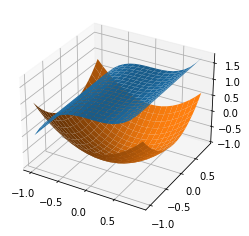

In [9]:
# Constraint function in orange, objective function in blue
x = 1.
plot_2d_function(-x,-x,x,x,f_demo5b,f2_demo5b).show()
# Optimal solution is in x1=0 and x3=-1 where the two surfaces intersect (and constraint=0). You can verify that 
# by solving the problem     min f_demo5b(x) s.t. f2_demo5b(x)=0

## Task 4

* max 2p, 2p for correct result, reductions if flaws

In [10]:
# from the lectures
def augmented_langrangian(f,x,la,c):
    second_term = float(numpy.matrix(la)*numpy.matrix(f(x)[2]).
                    transpose())
    third_term = 0.5*c*numpy.linalg.norm(f(x)[2])**2
    return f(x)[0]+second_term+third_term

In [11]:
# from the lectures
from scipy.optimize import minimize
import numpy
def augmented_langrangian_method(f,start,la0,c0):
    x_old = [float('inf')]*4
    x_new = start
    f_old = float('inf')
    f_new = f(x_new)[0]
    la = la0
    c = c0
#    while numpy.linalg.norm(f(x_new)[2])>0.000001:
    while abs(f_old-f_new)>0.000001:
        print(x_new)
        f_old = f_new
        res = minimize(lambda x:augmented_langrangian(f,x,la,c),x_new)
        x_old = x_new
        la = la+c*numpy.matrix(f(res.x)[2])
        print(la)
        x_new = res.x
        f_new = f(x_new)[0]
        c=2*c
    return x_new,c

In [12]:
# Again, starting affects the solution obtained
x0 = [5,3,4,5]
#x0 = [1.0,1.1,-1.1,0.1]
#x0 = [0.1,0.1,-0.1,0.1]
x_opt = augmented_langrangian_method(f_demo5,x0,[1,1],1)
print(f_demo5(x_opt[0]))
print(x_opt)

[5, 3, 4, 5]
[[6.92113034e-13 2.25000064e+00]]
[ 4.17912635e-08 -8.30870797e-07 -1.50000021e+00  1.00000190e+00]
[[-0.9999998   0.25000064]]
[-6.78345365e-06 -7.07106853e-01  1.02765152e-06  1.00000087e+00]
[[-1.00000287e+00  7.48944078e-06]]
[-0.96824589 -0.24999826  0.00126951  0.99999932]
[[-1.00000522e+00  5.34623905e-06]]
(0.9999997066022224, [], [-2.934278535704493e-07, -2.67900216566197e-07])
(array([-9.99999819e-01,  2.61407455e-04,  3.06368234e-04,  1.00000115e+00]), 16)
